## Chirp.

We construct chirp data with some gaussian noise.

We want to fit a smooth model to the data: SplinesDynamicModel with unknown knot number and locations.

Demonstration:
1. SplinesDynamicModel
2. NestedSampler


In [1]:
import numpy as numpy
import math

from astropy.io import ascii

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

from BayesicFitting import SplinesDynamicModel

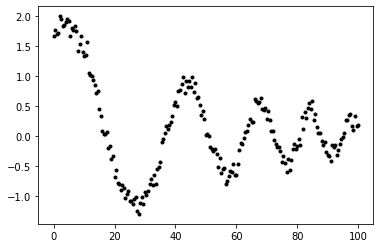

In [2]:
t = numpy.linspace( 0, 100, 201, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * numpy.exp( t / 60 ) +1 ) * numpy.exp( -0.02 * t )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( 201 ) * 0.1
plt.plot( t, y, 'k.' )
plt.show()

In [3]:
knots =[0, 30, 60, 100]
mxk = 15
mdl = SplinesDynamicModel( knots=knots, dynamic=True, maxKnots=mxk, minKnots=4, minDistance=0.03 )
mdl.setLimits( lowLimits=[-10.0], highLimits=[+10.0] )

# Tools.printclass( mdl )


Fit all parameters of
  DynModBasicSplines of order 3 with 4 knots.
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine  BirthEngine  DeathEngine  StructureEngine
Iteration     logZ        H       LowL     npar parameters                                   scale
       0  -2.48e+07 8118383.6  -1.66e+07     13  [   -5.274   -0.483   -0.828    6.896 ...    0.011]
     100  -4.28e+04   2502.3  -4.03e+04     11  [   -8.730   -8.541   -3.632   -9.570 ...    0.222]
     200  -5.31e+03     49.3  -5.26e+03     11  [   -4.309   -0.621   -0.921    6.422 ...    0.513]
     300  -2.72e+03      8.6  -2.71e+03     11  [   -4.424    8.243    5.306    7.552 ...    0.975]
     400  -1.75e+03      9.5  -1.74e+03     10  [    9.496   -5.368    1.822    1.822 ...    0.706]
     500  -1.29e+03      9.8  -1.28e+03     12  [    0.687   -5.563    4.637    5.352 ...    0.963]
     600  -1.06e+03     10.3  -1.05e+03     13  [    0.792    7.516    0.976    5.1

    7900       76.6     75.9       155.     15  [    1.726    2.784   -3.675    1.202 ...    0.122]
    8000       77.1     76.6       156.     15  [    1.802    2.709   -3.687    1.365 ...    0.121]
    8100       77.5     77.3       158.     15  [    1.794    2.956   -3.600    1.333 ...    0.113]
    8200       77.9     78.1       159.     15  [    1.640    3.104   -4.083    1.826 ...    0.112]
    8300       78.2     78.7       160.     18  [    1.741    2.972   -3.894    1.520 ...    0.118]
    8400       78.5     79.3       161.     15  [    1.747    2.831   -3.823    1.620 ...    0.117]
    8500       78.7     79.9       162.     15  [    1.679    2.953   -3.859    1.693 ...    0.114]
    8600       79.0     80.5       163.     15  [    1.748    2.972   -3.955    1.782 ...    0.108]
    8700       79.2     81.2       165.     15  [    1.786    2.862   -3.906    1.706 ...    0.112]
    8800       79.3     81.8       166.     16  [    1.748    3.012   -4.036    1.782 ...    0.110]


   16100       80.1     85.3       187.     15  [    1.650    3.040   -4.160    1.398 ...    0.097]
   16200       80.1     85.3       188.     15  [    1.666    3.027   -4.148    1.390 ...    0.097]
   16300       80.1     85.3       188.     15  [    1.658    3.033   -4.159    1.398 ...    0.096]
   16400       80.1     85.3       188.     15  [    1.644    3.052   -4.192    1.398 ...    0.097]
   16500       80.1     85.3       188.     15  [    1.666    3.025   -4.198    1.447 ...    0.096]
   16600       80.1     85.3       188.     15  [    1.651    3.038   -4.184    1.394 ...    0.096]
   16700       80.1     85.3       188.     15  [    1.660    3.030   -4.211    1.423 ...    0.095]
   16800       80.1     85.3       188.     15  [    1.645    3.056   -4.208    1.402 ...    0.095]
   16900       80.1     85.3       188.     15  [    1.656    3.058   -4.234    1.459 ...    0.097]
   17000       80.1     85.3       188.     15  [    1.653    3.041   -4.209    1.430 ...    0.095]


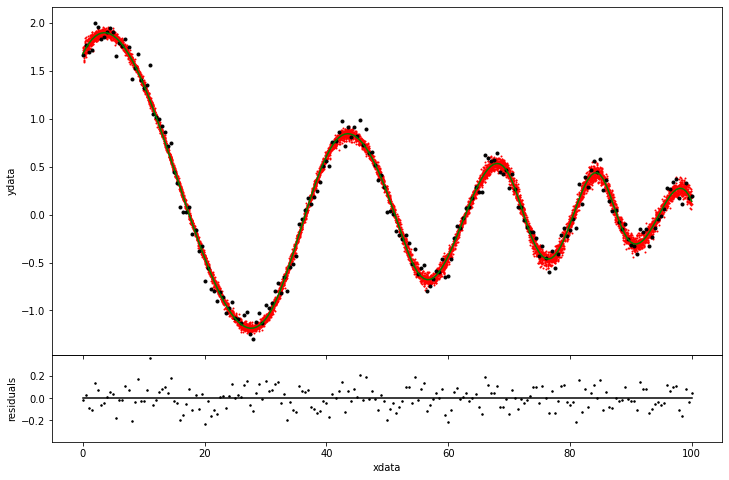

In [4]:
#eng = ["galilean", "birth", "death", "struct"]
ns = NestedSampler( t, mdl, y, seed=1235 )
ns.distribution.setLimits( [0.01,1] )
ns.minimumIterations = 1000
ns.verbose=2
#ns.engines[1].slow = 100

evid = ns.sample( plot=True )



In [5]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.knots, max=None ) )
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.knots, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    0.000   29.253   40.699   49.937   56.396   69.828   70.729   78.592   85.685   88.557   89.929  100.000]
[    1.643    2.567   -3.179    0.731    1.221   -2.067    0.976    0.293   -1.077    1.058   -0.097   -0.097    0.012
     0.708]
[    0.000   29.164   44.183   48.449   57.800   68.165   71.830   77.984   85.705   86.459   93.255  100.000]
[    1.643    2.567   -3.179    0.731    1.221   -2.067    0.976    0.293   -1.077    1.058   -0.097   -0.097    0.012
     0.708]


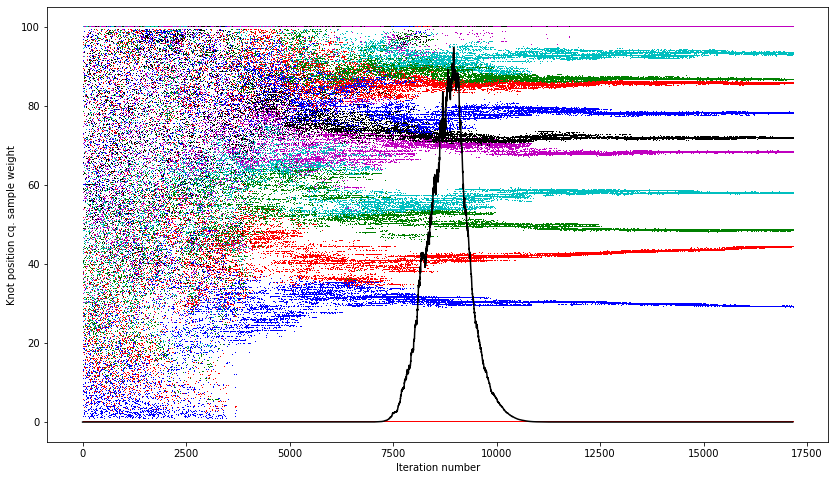

In [6]:
## Plot the evolutie of knots and sample weights
cc = ['k,', 'b,', 'r,', 'g,', 'c,', 'm,']
sl = ns.samples
ka = numpy.zeros( ( mxk, len( sl ) ), dtype=float )
for k,s in enumerate( sl ) :
    n = len( s.model.knots )
    ka[:n,k] = s.model.knots
plt.figure( 1, figsize=[14,8] )    
for j in range( mxk ) :
    plt.plot( ka[j,:], cc[j%6] )
wgts = sl.getWeightEvolution()
plt.plot( 100000 * wgts, 'k-' )
plt.xlabel( "Iteration number" )
plt.ylabel( "Knot position cq. sample weight")
plt.show()

